In [1]:
import lpipsreg
import lpips
import torch.nn.functional as F
from kornia import geometry as KG
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)


In [2]:
def visualize_warp(filename, fixed, moving, warped):
    fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharex='all', sharey='all', frameon=False)
    axs[0].imshow(fixed)
    axs[1].imshow(moving)
    axs[2].imshow(warped)
    axs[0].axis('off')
    axs[1].axis('off')
    axs[2].axis('off')
    axs[0].set_title('Fixed')
    axs[1].set_title('Moving')
    axs[2].set_title('Warped')
    fig.tight_layout()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

def video_warp(im_1, im_2, filename):
    time = 5
    frames = round(2 / 0.05)
    fig, ax = plt.subplots()
    fig.set_size_inches(4, 4)
    ax.axis('off')
    fig.tight_layout()
    ax.imshow(im_1)
    im = ax.imshow(im_2, alpha=0)

    def animate(i):
        if i * 0.05 <= 1:
            im.set_alpha(i * 0.05)
        else:
            im.set_alpha(1 - (i - 20) * 0.05)
        return im

    ani = FuncAnimation(fig, animate, interval=time / frames, frames=frames)
    ani.save(filename, fps=frames / time, dpi=100)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/lpips/weights/v0.1/alex.pth
Loss = 0.8476, iter=0, lr=0.0200


/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:819: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  _warn_get_lr_called_within_step(self)


Loss = 0.8005, iter=10, lr=0.0181
Loss = 0.7099, iter=20, lr=0.0171
Loss = 0.7009, iter=30, lr=0.0163
Loss = 0.7031, iter=40, lr=0.0155
Loss = 0.7039, iter=50, lr=0.0147
Loss = 0.6950, iter=60, lr=0.0140
Loss = 0.6941, iter=70, lr=0.0133
Loss = 0.6960, iter=80, lr=0.0126
Loss = 0.6943, iter=90, lr=0.0120
Loss = 1.0089, iter=0, lr=0.0200
Loss = 0.9742, iter=10, lr=0.0181
Loss = 0.9905, iter=20, lr=0.0171
Loss = 0.9832, iter=30, lr=0.0163
Loss = 0.9798, iter=40, lr=0.0155
Loss = 0.9793, iter=50, lr=0.0147
Loss = 0.9749, iter=60, lr=0.0140
Loss = 0.9754, iter=70, lr=0.0133
Loss = 0.9785, iter=80, lr=0.0126
Loss = 0.9745, iter=90, lr=0.0120
Loss = 1.2433, iter=0, lr=0.0200
Loss = 1.3742, iter=10, lr=0.0181
Loss = 1.3418, iter=20, lr=0.0171
Loss = 1.3260, iter=30, lr=0.0163
Loss = 1.2423, iter=40, lr=0.0155
Loss = 1.2288, iter=50, lr=0.0147
Loss = 1.2498, iter=60, lr=0.0140
Loss = 1.2315, iter=70, lr=0.0133
Loss = 1.2268, iter=80, lr=0.0126
Loss = 1.2298, iter=90, lr=0.0120


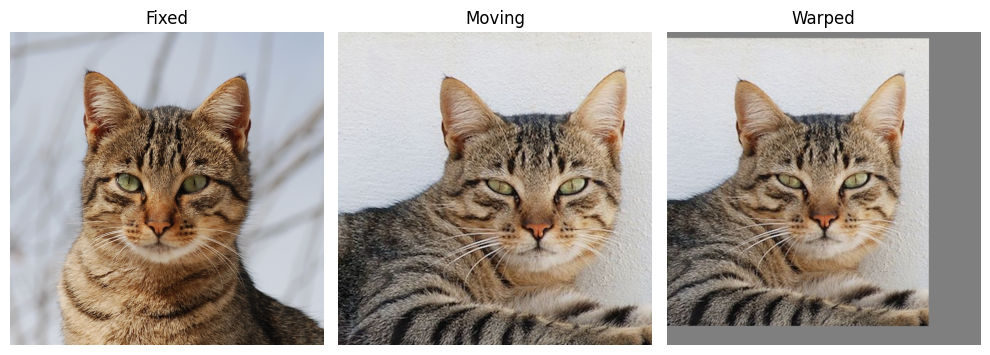

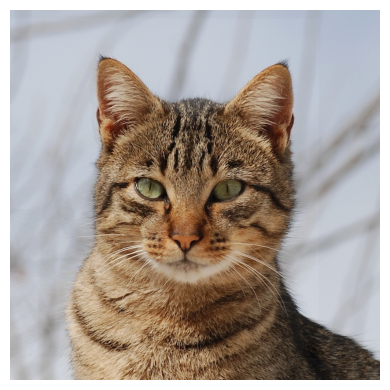

In [3]:
with Image.open('data/cat_fixed.png').convert('RGB') as im:
    fixed = np.array(im)
with Image.open('data/cat1.png').convert('RGB') as im:
    moving = np.array(im)
fixed = lpips.im2tensor(fixed)
moving = lpips.im2tensor(moving)

registrator = lpipsreg.LPIPSRegistrator('similarity', lr=0.02, num_iterations=100, tolerance=1E-6, pyramid_levels=3)
homography = registrator.register(moving, fixed, verbose=True)
warped = KG.homography_warp(moving, homography[0], moving.shape[-2:])
fixed_im = np.moveaxis(np.squeeze(fixed.detach().numpy()), 0, -1)/2 + 0.5
moving_im = np.moveaxis(np.squeeze(moving.detach().numpy()), 0, -1)/2 + 0.5
warped_im = np.moveaxis(np.squeeze(warped.detach().numpy()), 0, -1)/2 + 0.5
visualize_warp('figures/cat1.png', fixed_im, moving_im, warped_im)
video_warp(fixed_im, warped_im, 'figures/cat1.mp4')

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/lpips/weights/v0.1/alex.pth
Loss = 0.9846, iter=0, lr=0.0200


/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:819: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  _warn_get_lr_called_within_step(self)


Loss = 0.9926, iter=10, lr=0.0181
Loss = 0.9808, iter=20, lr=0.0171
Loss = 0.9232, iter=30, lr=0.0163
Loss = 0.9116, iter=40, lr=0.0155
Loss = 0.9093, iter=50, lr=0.0147
Loss = 0.9053, iter=60, lr=0.0140
Loss = 0.9078, iter=70, lr=0.0133
Loss = 0.9028, iter=80, lr=0.0126
Loss = 0.9047, iter=90, lr=0.0120
Loss = 1.1503, iter=0, lr=0.0200
Loss = 1.2147, iter=10, lr=0.0181
Loss = 1.1785, iter=20, lr=0.0171
Loss = 1.1651, iter=30, lr=0.0163
Loss = 1.1710, iter=40, lr=0.0155
Loss = 1.1989, iter=50, lr=0.0147
Loss = 1.2026, iter=60, lr=0.0140
Loss = 1.2008, iter=70, lr=0.0133
Loss = 1.1947, iter=80, lr=0.0126
Loss = 1.1913, iter=90, lr=0.0120
Loss = 1.4289, iter=0, lr=0.0200
Loss = 1.4500, iter=10, lr=0.0181
Loss = 1.4299, iter=20, lr=0.0171
Loss = 1.4389, iter=30, lr=0.0163
Loss = 1.3972, iter=40, lr=0.0155
Loss = 1.3697, iter=50, lr=0.0147
Loss = 1.3845, iter=60, lr=0.0140
Loss = 1.3799, iter=70, lr=0.0133
Loss = 1.3882, iter=80, lr=0.0126
Loss = 1.3804, iter=90, lr=0.0120


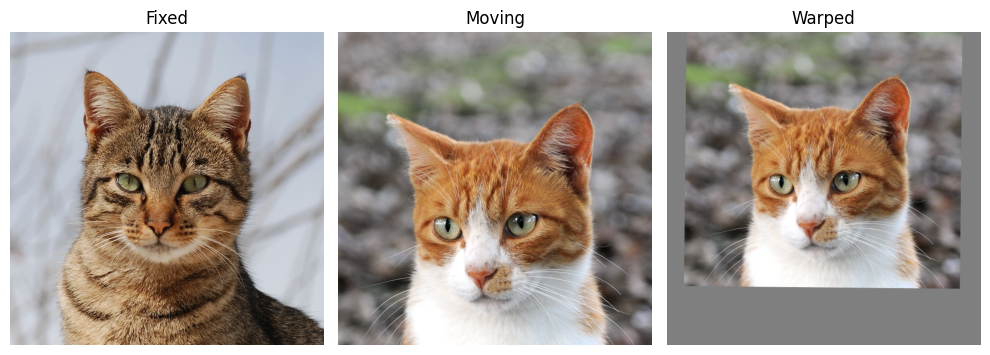

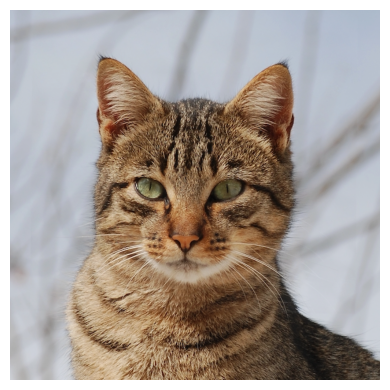

In [4]:
with Image.open('data/cat_fixed.png').convert('RGB') as im:
    fixed = np.array(im)
with Image.open('data/cat2.png').convert('RGB') as im:
    moving = np.array(im)
fixed = lpips.im2tensor(fixed)
moving = lpips.im2tensor(moving)

registrator = lpipsreg.LPIPSRegistrator('similarity', lr=0.02, num_iterations=100, tolerance=1E-6, pyramid_levels=3)
homography = registrator.register(moving, fixed, verbose=True)
warped = KG.homography_warp(moving, homography[0], moving.shape[-2:])
fixed_im = np.moveaxis(np.squeeze(fixed.detach().numpy()), 0, -1)/2 + 0.5
moving_im = np.moveaxis(np.squeeze(moving.detach().numpy()), 0, -1)/2 + 0.5
warped_im = np.moveaxis(np.squeeze(warped.detach().numpy()), 0, -1)/2 + 0.5
visualize_warp('figures/cat2.png', fixed_im, moving_im, warped_im)
video_warp(fixed_im, warped_im, 'figures/cat2.mp4')

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/lpips/weights/v0.1/alex.pth
Loss = 0.8550, iter=0, lr=0.0200


/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:819: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  _warn_get_lr_called_within_step(self)


Loss = 0.9007, iter=10, lr=0.0181
Loss = 0.8959, iter=20, lr=0.0171
Loss = 0.8817, iter=30, lr=0.0163
Loss = 0.8756, iter=40, lr=0.0155
Loss = 0.8679, iter=50, lr=0.0147
Loss = 0.8666, iter=60, lr=0.0140
Loss = 0.8660, iter=70, lr=0.0133
Loss = 0.8653, iter=80, lr=0.0126
Loss = 0.8648, iter=90, lr=0.0120
Loss = 1.1603, iter=0, lr=0.0200
Loss = 1.1889, iter=10, lr=0.0181
Loss = 1.1433, iter=20, lr=0.0171
Loss = 1.1400, iter=30, lr=0.0163
Loss = 1.1572, iter=40, lr=0.0155
Loss = 1.1290, iter=50, lr=0.0147
Loss = 1.1353, iter=60, lr=0.0140
Loss = 1.1513, iter=70, lr=0.0133
Loss = 1.1474, iter=80, lr=0.0126
Loss = 1.1410, iter=90, lr=0.0120
Loss = 1.3274, iter=0, lr=0.0200
Loss = 1.4392, iter=10, lr=0.0181
Loss = 1.4299, iter=20, lr=0.0171
Loss = 1.3264, iter=30, lr=0.0163
Loss = 1.3265, iter=40, lr=0.0155
Loss = 1.3280, iter=50, lr=0.0147
Loss = 1.3253, iter=60, lr=0.0140
Loss = 1.3168, iter=70, lr=0.0133
Loss = 1.3138, iter=80, lr=0.0126
Loss = 1.3138, iter=90, lr=0.0120


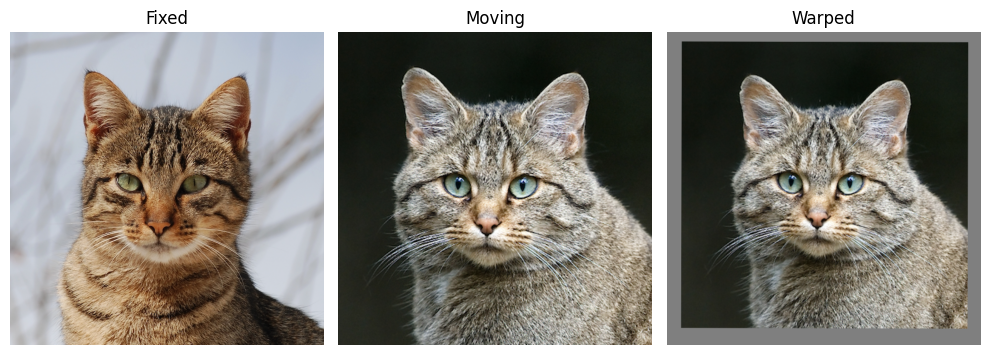

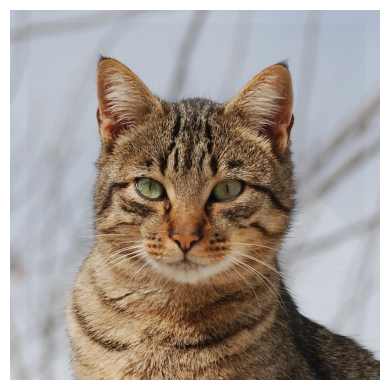

In [5]:
with Image.open('data/cat_fixed.png').convert('RGB') as im:
    fixed = np.array(im)
with Image.open('data/cat3.png').convert('RGB') as im:
    moving = np.array(im)
fixed = lpips.im2tensor(fixed)
moving = lpips.im2tensor(moving)

registrator = lpipsreg.LPIPSRegistrator('similarity', lr=0.02, num_iterations=100, tolerance=1E-6, pyramid_levels=3)
homography = registrator.register(moving, fixed, verbose=True)
warped = KG.homography_warp(moving, homography[0], moving.shape[-2:])
fixed_im = np.moveaxis(np.squeeze(fixed.detach().numpy()), 0, -1)/2 + 0.5
moving_im = np.moveaxis(np.squeeze(moving.detach().numpy()), 0, -1)/2 + 0.5
warped_im = np.moveaxis(np.squeeze(warped.detach().numpy()), 0, -1)/2 + 0.5
visualize_warp('figures/cat3.png', fixed_im, moving_im, warped_im)
video_warp(fixed_im, warped_im, 'figures/cat3.mp4')

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/lpips/weights/v0.1/alex.pth
Loss = 1.0419, iter=0, lr=0.0200


/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:819: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  _warn_get_lr_called_within_step(self)


Loss = 1.0731, iter=10, lr=0.0181
Loss = 1.0576, iter=20, lr=0.0171
Loss = 1.0537, iter=30, lr=0.0163
Loss = 1.0442, iter=40, lr=0.0155
Loss = 1.0508, iter=50, lr=0.0147
Loss = 1.0540, iter=60, lr=0.0140
Loss = 1.0500, iter=70, lr=0.0133
Loss = 1.0503, iter=80, lr=0.0126
Loss = 1.0493, iter=90, lr=0.0120
Loss = 1.3812, iter=0, lr=0.0200
Loss = 1.3224, iter=10, lr=0.0181
Loss = 1.2613, iter=20, lr=0.0171
Loss = 1.1927, iter=30, lr=0.0163
Loss = 1.1846, iter=40, lr=0.0155
Loss = 1.1789, iter=50, lr=0.0147
Loss = 1.1728, iter=60, lr=0.0140
Loss = 1.1729, iter=70, lr=0.0133
Loss = 1.1697, iter=80, lr=0.0126
Loss = 1.1668, iter=90, lr=0.0120
Loss = 1.3675, iter=0, lr=0.0200
Loss = 1.4070, iter=10, lr=0.0181
Loss = 1.4082, iter=20, lr=0.0171
Loss = 1.4139, iter=30, lr=0.0163
Loss = 1.4271, iter=40, lr=0.0155
Loss = 1.4043, iter=50, lr=0.0147
Loss = 1.3726, iter=60, lr=0.0140
Loss = 1.3674, iter=70, lr=0.0133
Loss = 1.3687, iter=80, lr=0.0126
Loss = 1.3779, iter=90, lr=0.0120


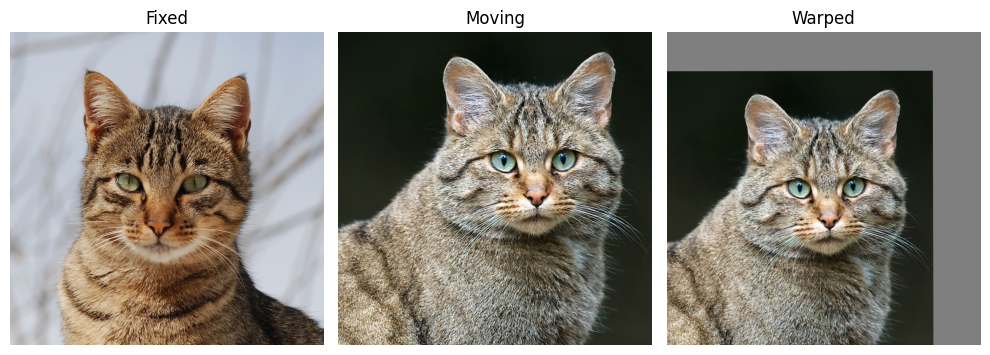

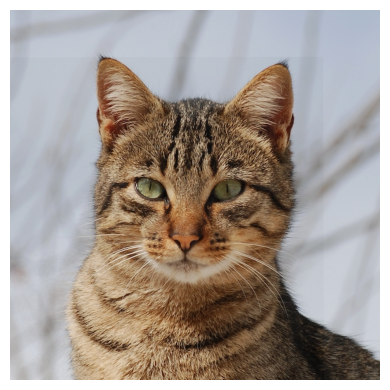

In [6]:
with Image.open('data/cat_fixed.png').convert('RGB') as im:
    fixed = np.array(im)
with Image.open('data/cat4.png').convert('RGB') as im:
    moving = np.array(im)
fixed = lpips.im2tensor(fixed)
moving = lpips.im2tensor(moving)

registrator = lpipsreg.LPIPSRegistrator('similarity', lr=0.02, num_iterations=100, tolerance=1E-6, pyramid_levels=3)
homography = registrator.register(moving, fixed, verbose=True)
warped = KG.homography_warp(moving, homography[0], moving.shape[-2:])
fixed_im = np.moveaxis(np.squeeze(fixed.detach().numpy()), 0, -1)/2 + 0.5
moving_im = np.moveaxis(np.squeeze(moving.detach().numpy()), 0, -1)/2 + 0.5
warped_im = np.moveaxis(np.squeeze(warped.detach().numpy()), 0, -1)/2 + 0.5
visualize_warp('figures/cat4.png', fixed_im, moving_im, warped_im)
video_warp(fixed_im, warped_im, 'figures/cat4.mp4')

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/lpips/weights/v0.1/alex.pth
Loss = 1.0610, iter=0, lr=0.0150


/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:819: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  _warn_get_lr_called_within_step(self)


Loss = 1.0492, iter=10, lr=0.0135
Loss = 1.0432, iter=20, lr=0.0129
Loss = 1.0369, iter=30, lr=0.0122
Loss = 1.0342, iter=40, lr=0.0116
Loss = 1.0333, iter=50, lr=0.0110
Loss = 1.0332, iter=60, lr=0.0105
Loss = 1.0327, iter=70, lr=0.0100
Loss = 1.3118, iter=0, lr=0.0150
Loss = 1.3189, iter=10, lr=0.0135
Loss = 1.3164, iter=20, lr=0.0129
Loss = 1.3054, iter=30, lr=0.0122
Loss = 1.2963, iter=40, lr=0.0116
Loss = 1.2842, iter=50, lr=0.0110
Loss = 1.2831, iter=60, lr=0.0105
Loss = 1.2825, iter=70, lr=0.0100
Loss = 1.2804, iter=80, lr=0.0095
Loss = 1.2815, iter=90, lr=0.0090
Loss = 1.5212, iter=0, lr=0.0150
Loss = 1.5177, iter=10, lr=0.0135
Loss = 1.5090, iter=20, lr=0.0129
Loss = 1.5178, iter=30, lr=0.0122
Loss = 1.5132, iter=40, lr=0.0116
Loss = 1.5129, iter=50, lr=0.0110
Loss = 1.5118, iter=60, lr=0.0105
Loss = 1.5127, iter=70, lr=0.0100
Loss = 1.5120, iter=80, lr=0.0095
Loss = 1.5049, iter=90, lr=0.0090


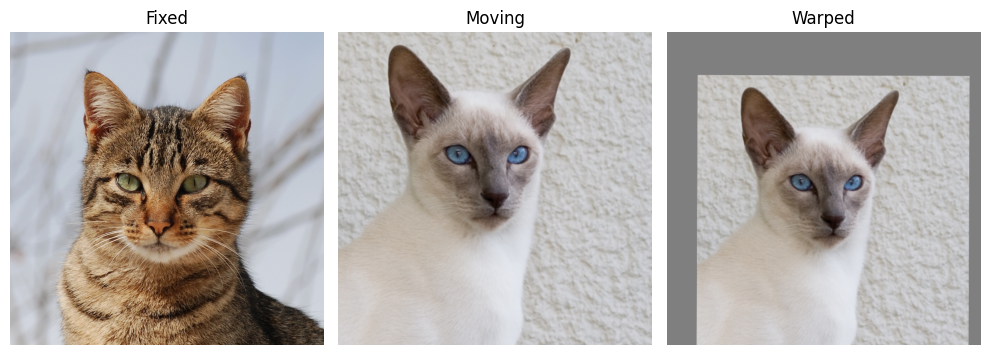

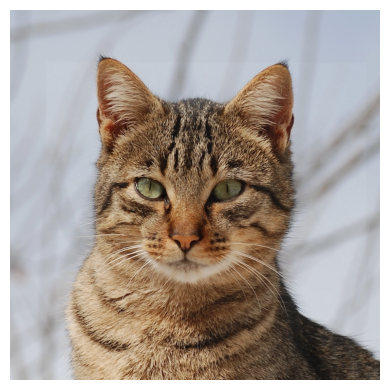

In [7]:
with Image.open('data/cat_fixed.png').convert('RGB') as im:
    fixed = np.array(im)
with Image.open('data/cat5.png').convert('RGB') as im:
    moving = np.array(im)
fixed = lpips.im2tensor(fixed)
moving = lpips.im2tensor(moving)

registrator = lpipsreg.LPIPSRegistrator('similarity', lr=0.015, num_iterations=100, tolerance=1E-6, pyramid_levels=3)
homography = registrator.register(moving, fixed, verbose=True)
warped = KG.homography_warp(moving, homography[0], moving.shape[-2:])
fixed_im = np.moveaxis(np.squeeze(fixed.detach().numpy()), 0, -1)/2 + 0.5
moving_im = np.moveaxis(np.squeeze(moving.detach().numpy()), 0, -1)/2 + 0.5
warped_im = np.moveaxis(np.squeeze(warped.detach().numpy()), 0, -1)/2 + 0.5
visualize_warp('figures/cat5.png', fixed_im, moving_im, warped_im)
video_warp(fixed_im, warped_im, 'figures/cat5.mp4')

Loss = 0.8001, iter=0, lr=0.0200


/Users/cbchosy/anaconda3/envs/torch/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:819: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  _warn_get_lr_called_within_step(self)


Loss = 0.5493, iter=10, lr=0.0181
Loss = 0.4560, iter=20, lr=0.0171
Loss = 0.4542, iter=30, lr=0.0163
Loss = 0.4553, iter=40, lr=0.0155
Loss = 0.4549, iter=50, lr=0.0147
Loss = 0.4513, iter=60, lr=0.0140
Loss = 0.4810, iter=0, lr=0.0200
Loss = 0.4851, iter=10, lr=0.0181
Loss = 0.4875, iter=20, lr=0.0171
Loss = 0.4804, iter=30, lr=0.0163
Loss = 0.5217, iter=0, lr=0.0200
Loss = 0.5241, iter=10, lr=0.0181
Loss = 0.5193, iter=20, lr=0.0171
Loss = 0.5197, iter=30, lr=0.0163
Loss = 0.5226, iter=40, lr=0.0155
Loss = 0.5226, iter=50, lr=0.0147
Loss = 0.5189, iter=60, lr=0.0140


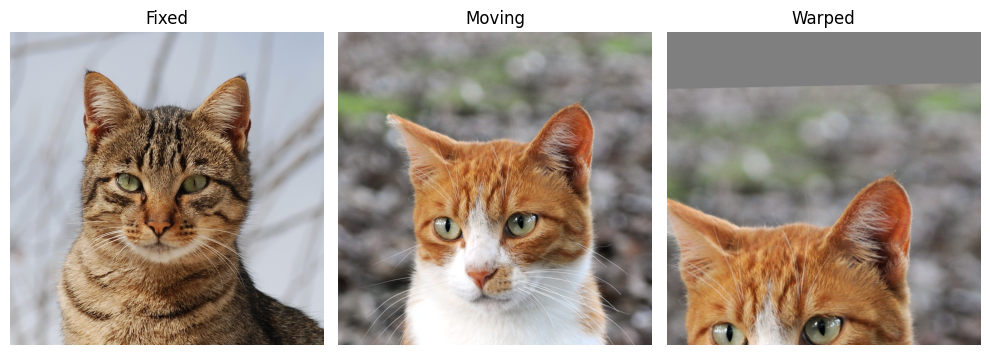

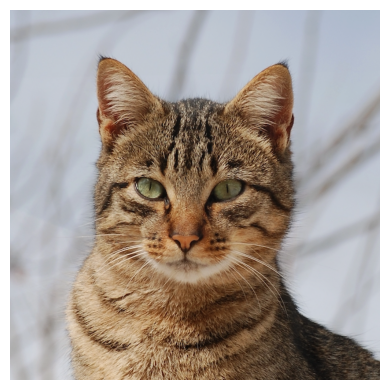

In [8]:
#Demonstrates failed registration based on classical MSE loss metric

with Image.open('data/cat_fixed.png').convert('RGB') as im:
    fixed = np.array(im)
with Image.open('data/cat2.png').convert('RGB') as im:
    moving = np.array(im)
fixed = lpips.im2tensor(fixed)
moving = lpips.im2tensor(moving)

registrator = lpipsreg.ClassicalRegistrator('similarity', loss_fn=F.mse_loss, lr=0.02, num_iterations=200, tolerance=1E-5, pyramid_levels=3)
homography, intermediate_loss = registrator.register(moving, fixed, verbose=True, output_intermediate_loss=True)
warped = KG.homography_warp(moving, homography, moving.shape[-2:])
fixed_im = np.moveaxis(np.squeeze(fixed.detach().numpy()), 0, -1)/2 + 0.5
moving_im = np.moveaxis(np.squeeze(moving.detach().numpy()), 0, -1)/2 + 0.5
warped_im = np.moveaxis(np.squeeze(warped.detach().numpy()), 0, -1)/2 + 0.5
visualize_warp('figures/cat2_mse.png', fixed_im, moving_im, warped_im)
video_warp(fixed_im, warped_im, 'figures/cat2_mse.mp4')